# Notebook che confronta i dataset Cicids2017 e Ciciot2023

This notebook compares the Cicids2017 and Ciciot2023 datasets, which are two datasets that contain network traffic data. The goal is to see if the two datasets contain the same classes and if the classes are balanced. 
The notebook also balances the classes in the datasets.

## Cicids2017

Import the necessary libraries

In [39]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

Load the dataset from disk and remove the rows with missing values and infinity values

In [40]:
file_name1 = "C:/Users/diges/Desktop/dataset/cicids/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
df1 = pd.read_csv(file_name1)
labels = {"Web Attack � Brute Force": "Web Attack-Brute Force" , "Web Attack � XSS": "Web Attack-XSS", "Web Attack � Sql Injection": "Web Attack-Sql Injection"}
for label in labels:
    df1[' Label'] = df1[' Label'].replace(label, labels[label])
df1.to_csv(file_name1, index=False)

# load the datset
directory = "C:/Users/diges/Desktop/dataset/cicids"
file_path = []

# search for all the csv files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path.append(os.path.join(directory, filename))

# create a dataframe for each csv file
df = []
for file in file_path:
    df.append(pd.read_csv(file))

# concatenate all the dataframes
dataframe = pd.concat(df, ignore_index=True)  # ignore_index=True is needed to reset the index of the dataframe

# rename the label column to label
dataframe = dataframe.rename(columns={' Label': 'label'})

# remove the rows with missing values
dataframe = dataframe.dropna()

# remove infinity values
dataframe = dataframe.replace([np.inf, -np.inf], np.nan)
dataframe = dataframe.dropna()

Print the first 5 rows of the dataframe, shape of the dataframe, and the columns of the dataframe

In [41]:
# print label column and count the number of unique classes
print(dataframe['label'].value_counts())

label
BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack-Brute Force         1507
Web Attack-XSS                  652
Infiltration                     36
Web Attack-Sql Injection         21
Heartbleed                       11
Name: count, dtype: int64


In [42]:
# print the first 5 rows of the dataframe
print(dataframe.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

In [43]:
# print the shape of the dataframe
print(dataframe.shape)

(2827876, 79)


In [44]:
# print the columns of the dataframe
print(dataframe.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Plot the histogram of the label column, to see the distribution of the classes

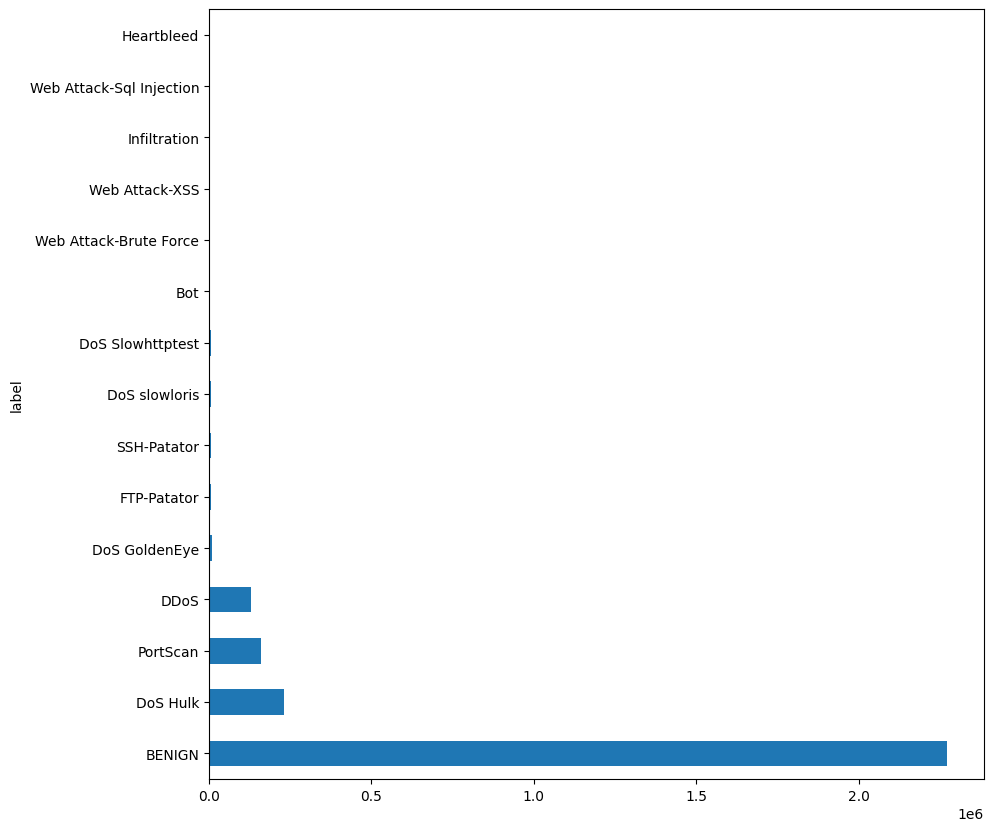

In [45]:
# plot histogram of the label column
dataframe['label'].value_counts().plot(kind='barh', figsize=(10, 10))
plt.show()

Balance the dataset and plot the histogram of the label column

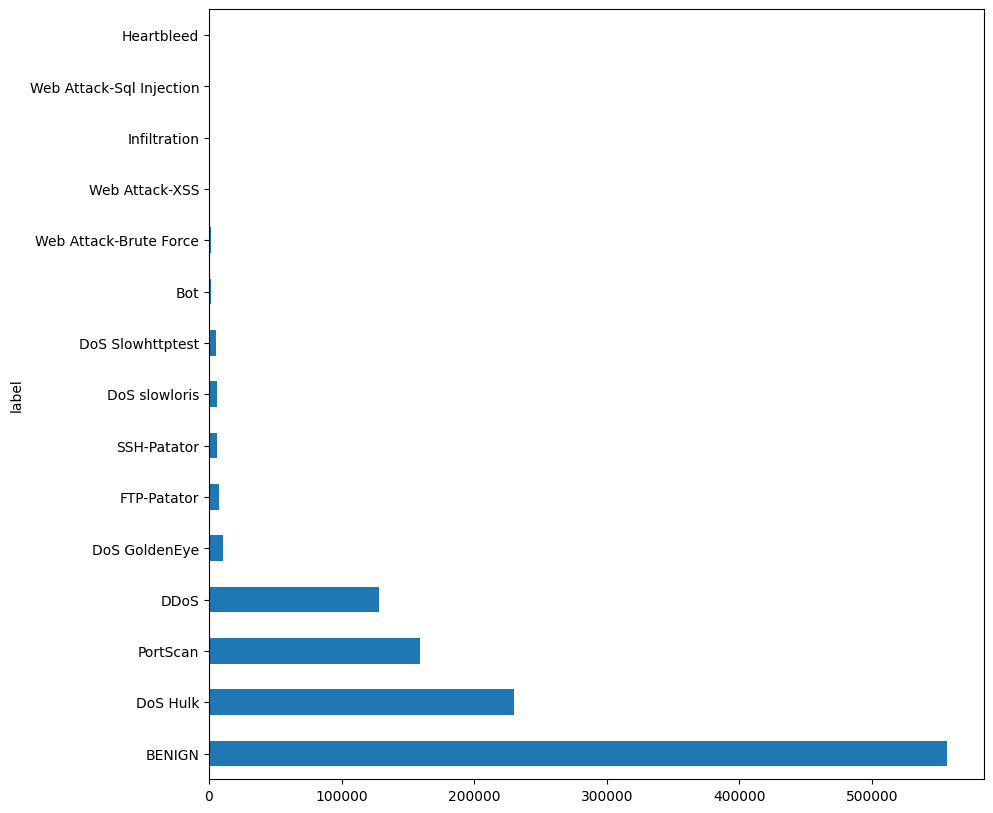

In [46]:
# balance the dataset
# separate the majority and minority classes
majority_class = dataframe[dataframe['label'] == 'BENIGN']
minority_class = dataframe[dataframe['label'] != 'BENIGN']

# downsample the majority class
majority_downsampled = majority_class.sample(n=len(minority_class), random_state=42)

# combine the downsampled majority class with the minority class
dataframe = pd.concat([majority_downsampled, minority_class])

# plot histogram of the label column
dataframe['label'].value_counts().plot(kind='barh', figsize=(10, 10))
plt.show()

In [47]:
# print the shape of the dataframe
print(dataframe.shape)

(1113112, 79)


## Ciciot2023

Load the dataset from disk and remove the rows with missing values and infinity values

In [48]:
# load the datset "C:/Users/diges/Desktop/dataset/prova"
directory = "C:/Users/diges/Desktop/dataset/prova"
file_path = []

# search for all the csv files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path.append(os.path.join(directory, filename))

# create a dataframe for each csv file
df = []
for file in file_path:
    df.append(pd.read_csv(file))

# concatenate all the dataframes
dataframe = pd.concat(df, ignore_index=True)  # ignore_index=True is needed to reset the index of the dataframe

# remove the rows with missing values
dataframe = dataframe.dropna()

Print the first 5 rows of the dataframe, shape of the dataframe, and the columns of the dataframe

In [49]:
# print label column and count the number of unique classes
print(dataframe['label'].value_counts())

label
DDoS-ICMP_Flood            1410100
DDoS-UDP_Flood             1060790
DDoS-TCP_Flood              881062
DDoS-PSHACK_Flood           800314
DDoS-SYN_Flood              796282
DDoS-RSTFINFlood            791729
DDoS-SynonymousIP_Flood     703346
DoS-UDP_Flood               649856
DoS-TCP_Flood               523119
DoS-SYN_Flood               396387
BenignTraffic               215310
Mirai-greeth_flood          193434
Mirai-udpplain              174358
Mirai-greip_flood           148148
DDoS-ICMP_Fragmentation      88218
MITM-ArpSpoofing             60305
DDoS-UDP_Fragmentation       56704
DDoS-ACK_Fragmentation       55966
DNS_Spoofing                 35333
Recon-HostDiscovery          26294
Recon-OSScan                 19129
Recon-PortScan               16079
DoS-HTTP_Flood               14114
VulnerabilityScan             7309
DDoS-HTTP_Flood               5574
DDoS-SlowLoris                4634
DictionaryBruteForce          2483
BrowserHijacking              1138
SqlInjection  

In [50]:
# print the first 5 rows of the dataframe
print(dataframe.head())

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   

In [51]:
# print the shape of the dataframe
print(dataframe.shape)

(9141675, 47)


In [52]:
# print the columns of the dataframe
print(dataframe.columns)

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


Plot the histogram of the label column, to see the distribution of the classes

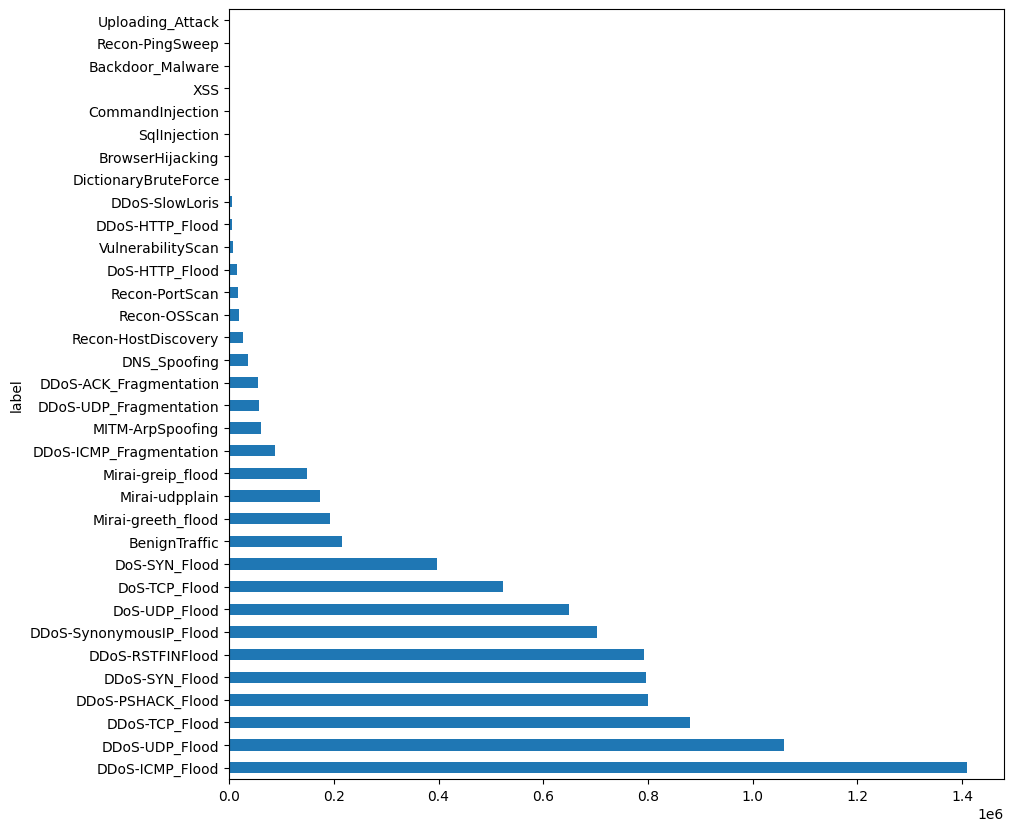

In [53]:
# plot histogram of the label column
dataframe['label'].value_counts().plot(kind='barh', figsize=(10, 10))
plt.show()

Balance the dataset and plot the histogram of the label column because the DDoS classes are to many and the other classes are few

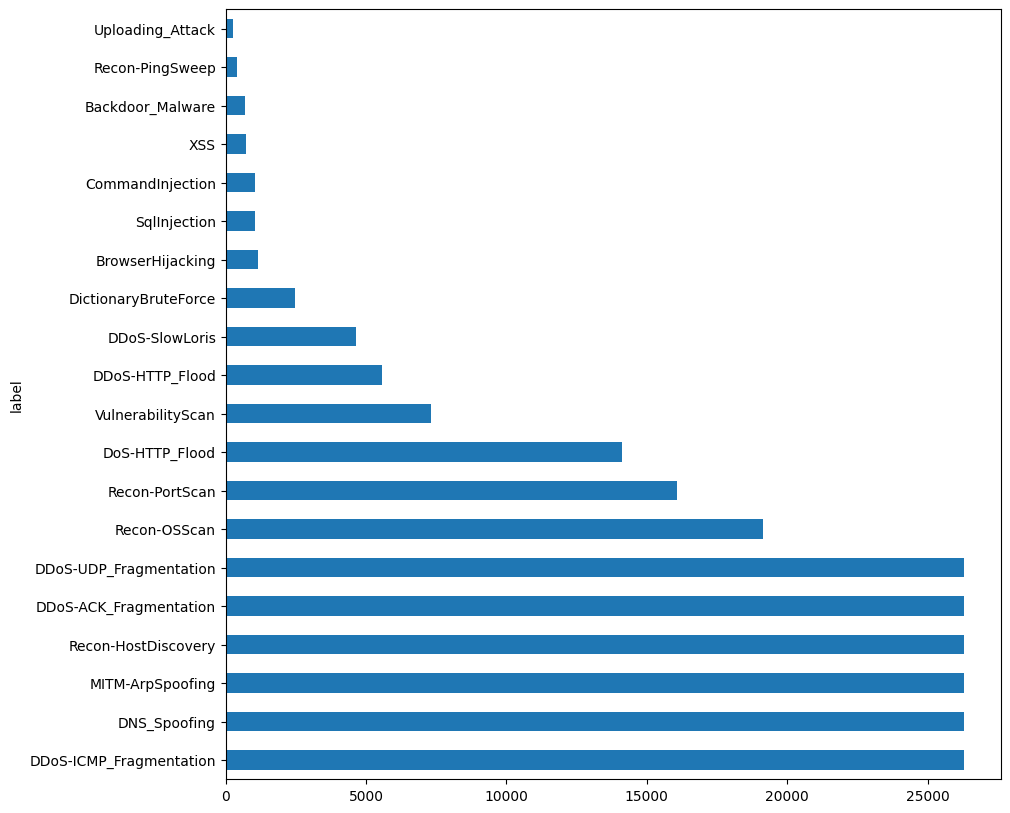

In [54]:
# balance the dataset
# Separate classes
majority_classes = ["DDoS-ICMP_Fragmentation", "MITM-ArpSpoofing", "DDoS-UDP_Fragmentation", "DDoS-ACK_Fragmentation", "DNS_Spoofing"]
minority_classes = ["Recon-HostDiscovery", "Recon-OSScan", "Recon-PortScan", "DoS-HTTP_Flood", "VulnerabilityScan", "DDoS-HTTP_Flood", "DDoS-SlowLoris", "DictionaryBruteForce", "BrowserHijacking", "SqlInjection", "CommandInjection", "XSS", "Backdoor_Malware", "Recon-PingSweep", "Uploading_Attack"]

# Sample majority classes to match minority class sizes
majority_downsampled = pd.concat([dataframe[dataframe['label'] == cls].sample(n=max(1, len(dataframe[dataframe['label'] == minority_classes[0]])), random_state=42) for cls in majority_classes])

# Combine downsampled majority classes with minority classes
balanced_dataframe = pd.concat([majority_downsampled, dataframe[dataframe['label'].isin(minority_classes)]])

# Plot histogram of the label column
balanced_dataframe['label'].value_counts().plot(kind='barh', figsize=(10, 10))
plt.show()